1.1 Example: Polynomial Curve Fitting

"Now suppose that we are given a training set comprising N observations of x, written x ≡ (x1 , . . . , xN )T , together with corresponding observations of the values of t, denoted t ≡ (t1, . . . , tN )T. Figure 1.2 shows a plot of a training set comprising N = 10 data points. The input data set x in Figure 1.2 was generated by choos- ing values of xn, for n = 1,...,N, spaced uniformly in range [0,1], and the target data set t was obtained by first computing the corresponding values of the function sin(2πx) 

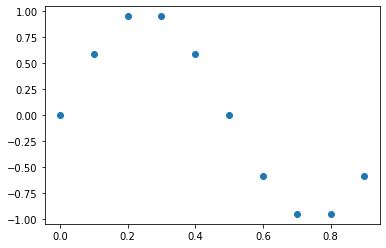

In [283]:
import numpy as np
import matplotlib.pyplot as plt
x_max = 1
x_min = 0
N = 10

x = np.arange(x_min,x_max,(x_max - x_min)/N )
t = np.sin(2*np.pi*x)
plt.plot(x,t,'o')

and then adding a small level of random noise having a Gaussian distri- bution (the Gaussian distribution is discussed in Section 1.2.4) to each such point in order to obtain the corresponding value tn. "

In [285]:
noise = np.random.normal(0,0.1,10)
print(noise)
t += noise

[ 0.17014685  0.08317631  0.06795462 -0.01144616  0.12795634  0.07795782
  0.02939069  0.03831879  0.12645199  0.15491815]


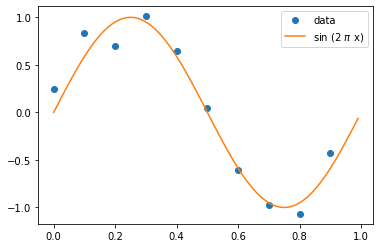

In [286]:
plt.plot(x,t,'o', label = 'data')
x_for_sinx = np.arange(x_min,x_max,(x_max - x_min)/100 )
plt.plot(x_for_sinx,np.sin(2*np.pi*x_for_sinx), label='sin (2 $\pi$ x)')
plt.legend()
plt.show() 

"Our goal is to exploit this training set in order to make predictions of the value t of the target variable for some new value x of the input variable. 

we shall proceed rather informally and consider a simple approach based on curve fitting. In particular, we shall fit the data using a polynomial function of the form"


In [305]:
from numpy import pi, r_
from scipy import optimize
from sklearn.metrics import mean_squared_error
from math import sqrt

N = 0

w = [0]*(N+1)

def pol(w,x,power):
    f = 0
    for i in range (0,power+1):
        f += w[i]*pow(x,i)
        #print(i, "pow  " , power, 'pow ', pow(x,power))
    return f 

w_initial = [0.5]*(N+1)

errfunc = lambda w, x, t: pol(w, x, N) - t # Distance to the target function

w1, success = optimize.leastsq(errfunc, w_initial[:], args=(x, t))
rms[0] = sqrt(mean_squared_error(t, pol(w1, x, N)))
M[0] = N

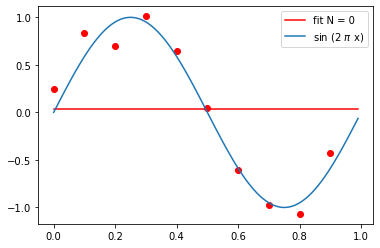

[0.04087119]
0.7285294619642183


In [306]:
plt.plot(x, t, "ro")
x_for_fit = np.arange(x_min,x_max,(x_max - x_min)/100 )
plt.plot(x_for_fit, pol(w1, x_for_fit, N), "r-", label = 'fit N = '+ str(N)) # Plot of the data and the fit
plt.plot(x_for_sinx,np.sin(2*np.pi*x_for_sinx), label='sin (2 $\pi$ x)')
plt.legend()
plt.show() 
print(w1)
rms[0] = sqrt(mean_squared_error(t, pol(w1, x, N)))
print(rms[0])

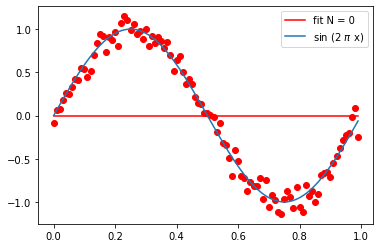

[-0.00210946]
0.7297962134229654


In [303]:
w1, success = optimize.leastsq(errfunc, w_initial[:], args=(x_test, t_test))

plt.plot(x_test, t_test, "ro")
x_for_fit = np.arange(x_min,x_max,(x_max - x_min)/100 )
plt.plot(x_for_fit, pol(w1, x_for_fit, N), "r-", label = 'fit N = '+ str(N)) # Plot of the data and the fit
plt.plot(x_for_sinx,np.sin(2*np.pi*x_for_sinx), label='sin (2 $\pi$ x)')
plt.legend()
plt.show() 
print(w1)
rms[0] = sqrt(mean_squared_error(t, pol(w1, x, N)))
print(rms[0])

0.4433903392352575


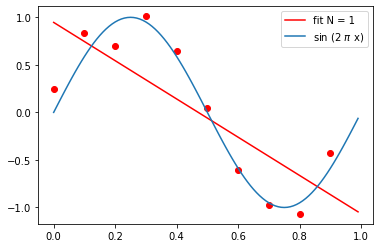

In [307]:
N=1
w_initial = [0.5]*(N+1)
w1, success = optimize.leastsq(errfunc, w_initial[:], args=(x, t))
rms[1] = sqrt(mean_squared_error(t, pol(w1, x, N)))
print(rms[1])
M[1] = N
plt.plot(x, t, "ro")
plt.plot(x_for_fit, pol(w1, x_for_fit, N), "r-", label =  'fit N = '+ str(N)) # Plot of the data and the fit
plt.plot(x_for_sinx,np.sin(2*np.pi*x_for_sinx), label='sin (2 $\pi$ x)')
plt.legend()
plt.show() 

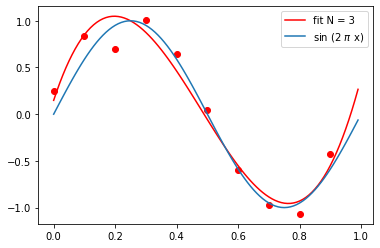

In [308]:
N=3
w_initial = [0]*(N+1)
w = [0]*(N+1)
w1, success = optimize.leastsq(errfunc, w_initial[:], args=(x, t))
rms[2] = sqrt(mean_squared_error(t, pol(w1, x, N)))
M[2] = N
plt.plot(x, t, "ro")
plt.plot(x_for_fit, pol(w1, x_for_fit, N), "r-" , label = 'fit N = '+ str(N)) # Plot of the data and the fit
plt.plot(x_for_sinx,np.sin(2*np.pi*x_for_sinx), label='sin (2 $\pi$ x)')
plt.legend()
plt.show() 

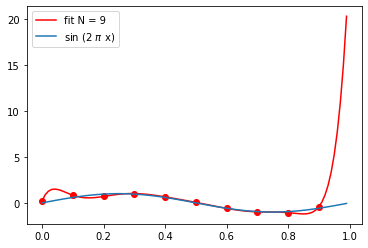

In [309]:
N=9
w_initial = [0]*(N+1)
w = [0]*(N+1)
w1, success = optimize.leastsq(errfunc, w_initial[:], args=(x, t))
rms[3] = sqrt(mean_squared_error(t, pol(w1, x, N)))
M[3] = N
plt.plot(x, t, "ro")
plt.plot(x_for_fit, pol(w1, x_for_fit, N), "r-" , label = 'fit N = '+ str(N)) # Plot of the data and the fit
plt.plot(x_for_sinx,np.sin(2*np.pi*x_for_sinx), label='sin (2 $\pi$ x)')
plt.legend()
plt.show() 

"As we have noted earlier, the goal is to achieve good generalization by making accurate predictions for new data. We can obtain some quantitative insight into the dependence of the generalization performance on M by considering a separate test set comprising 100 data points generated using exactly the same procedure used to generate the training set points but with new choices for the random noise values included in the target values"

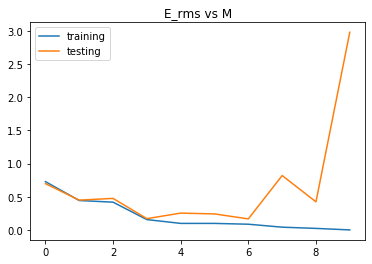

In [329]:
rms = [0]*10
rms_test = [0]*10
M = [0]*10

x_test = np.arange(x_min,x_max,(x_max - x_min)/100 )

t_test = np.sin(2*np.pi*x_test)
noise = np.random.normal(0,0.1,100)
t_test += noise

for i in range(0,10): 
    N = i   
    w = [0]*(N+1)
    w1, success = optimize.leastsq(errfunc, w_initial[:], args=(x, t))
    rms[i] = sqrt(mean_squared_error(t, pol(w1, x, N)))
    rms_test[i] = sqrt(mean_squared_error(t_test, pol(w1, x_test, N)))
    M[i] = N
    
plt.plot(M,rms, label = 'training')
plt.plot(M,rms_test, label = 'testing')
plt.title('E_rms vs M')
plt.legend()
plt.show() 

"One technique that is often used to control the over-fitting phenomenon in such cases is that of regularization, which involves adding a penalty term to the error function (1.2) in order to discourage the coefficients from reaching large values." 
#### add a regularization term to the error-function

$\hat{E}(w^{*}) = E(w) - \frac{\lambda}{2} w \cdot w^{T}$


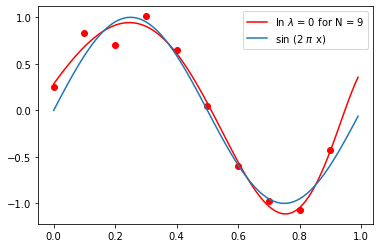

In [337]:
regweight = 1

N=9
w_initial = [0]*(N+1)
w = [0]*(N+1)
errfunc_reg = lambda w, x, t: np.mean( ( pol(w, x, N) - t )**2 ) + w.T @ w * regweight/2 
success = optimize.minimize(errfunc_reg, w_initial[:], args=(x, t))
w1 = success.x
plt.plot(x, t, "ro")
plt.plot(x_for_fit, pol(w1, x_for_fit, N), "r-" , label = 'ln $\lambda$ = 0 for N = '+ str(N)) # Plot of the data and the fit
plt.plot(x_for_sinx,np.sin(2*np.pi*x_for_sinx), label='sin (2 $\pi$ x)')
plt.legend()
plt.show() 

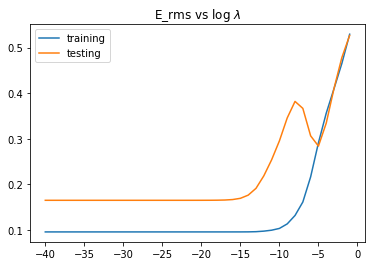

In [331]:
ln_l = [0]*40
ln_l_Erms = [0]*40
ln_l_Erms_test = [0]*40
M = [0]*40

N = 9
w = [0]*(N+1)
w_initial = [0]*(N+1)
    
ln_l_range = np.arange(-40,0,1)
#ln_l_range = threshold.tolist()

for i, val in enumerate(ln_l_range): 
    regweight = np.exp(val)
    success = optimize.minimize(errfunc_reg, w_initial[:], args=(x, t))
    w1 = success.x
    ln_l[i] = val
    ln_l_Erms[i] = sqrt(mean_squared_error(t, pol(w1, x, N)))
    ln_l_Erms_test[i] = sqrt(mean_squared_error(t_test, pol(w1, x_test, N)))
    
plt.plot(ln_l,ln_l_Erms, label = 'training')
plt.plot(ln_l,ln_l_Erms_test, label = 'testing')
plt.title('E_rms vs log $\lambda$')
plt.legend()
plt.show() 

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


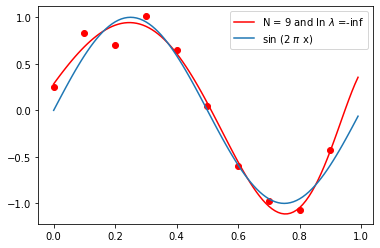

In [336]:
regweight =  0

success = optimize.minimize(errfunc_reg, w_initial[:], args=(x, t))
w1 = success.x
plt.plot(x, t, "ro")
plt.plot(x_for_fit, pol(w1, x_for_fit, N), "r-" , label = 'N = 9 and ln $\lambda$ ='+ str(np.log(regweight))) # Plot of the data and the fit
plt.plot(x_for_sinx,np.sin(2*np.pi*x_for_sinx), label='sin (2 $\pi$ x)')
plt.legend()
plt.show() 

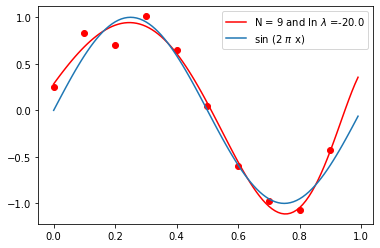

In [334]:
regweight = np.exp(-20)
success = optimize.minimize(errfunc_reg, w_initial[:], args=(x, t))
w1 = success.x
plt.plot(x, t, "ro")
plt.plot(x_for_fit, pol(w1, x_for_fit, N), "r-" ,  label = 'N = 9 and ln $\lambda$ ='+ str(np.log(regweight))) # Plot of the data and the fit
plt.plot(x_for_sinx,np.sin(2*np.pi*x_for_sinx), label='sin (2 $\pi$ x)')
plt.legend()
plt.show() 

"We have seen how the problem of polynomial curve fitting can be expressed in terms of error minimization. Here we return to the curve fitting example and view it from a probabilistic perspective, thereby gaining some insights into error functions and regularization, as well as taking us towards a full Bayesian treatment.
"

For this purpose, we shall assume that, given the value of x, the corresponding value of t has a Gaussian distribution with a mean equal to the value y(x, w) of the polynomial curve given by (1.1). 

2.3034499999999998

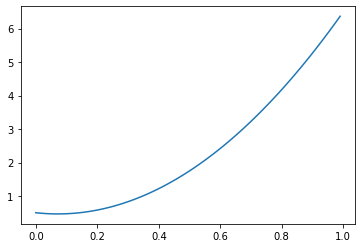

In [160]:
# pol function 1.1
x_max = 1
x_min = 0
N = 100

y_w = [0.5,-1,2,5]
y_x = np.arange(x_min,x_max,(x_max - x_min)/N )
y_t = y_w[0] + y_w[1] * y_x + y_w[2] * pow(y_x,2) + y_w[3] * pow(y_x,2)
plt.plot(y_x,y_t)
mean_y = np.mean(y_t)
mean_y

101

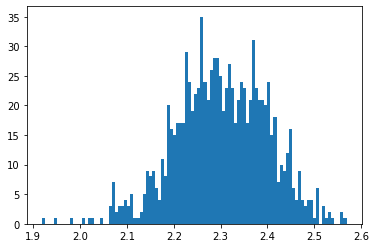

In [238]:
mu, sigma = mean_y, 0.1 
s = np.random.normal(mu, sigma, 1000)
p, edges, plot = plt.hist(s, bins=100)
len(edges)

"We now use the training data {x, t} to determine the values of the unknown parameters w and β by maximum likelihood." 
#### simply, we want to fit it by gaussian and determine mean and var

In [245]:
def gaussian(x, mu, sigma):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sigma, 2.)))

beta = pow(sigma,-2)
x = edges[:-1]
arg_in = [0.1,0.1]

errfunc_gauss = lambda arg, x, t: - pow(arg[1],-2) * np.mean( ( gaussian(x, arg[0], arg[1]) - t )**2 ) + len(x)/2 * np.log(pow(arg[1],-2)) - len(x)/2 * np.log(2*np.pi)
success = optimize.minimize(errfunc_gauss, arg_in[:], args=(x, p))
w1 = success.x

print(success)
print(w1)

      fun: -19629.63534402106
 hess_inv: array([[1, 0],
       [0, 1]])
      jac: array([     0.        , 394359.91137695])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 143
      nit: 0
     njev: 34
   status: 2
  success: False
        x: array([0.1, 0.1])
[0.1 0.1]


In [253]:
from scipy.stats import norm
import matplotlib.mlab as mlab

mu, sigma = norm.fit(s)
print(mu,sigma)
gaussian(y_x,)

2.3020373827124896 0.09771272426725759


Text(0.5, 1.0, 'Fit results: mu = 2.30,  std = 0.10')

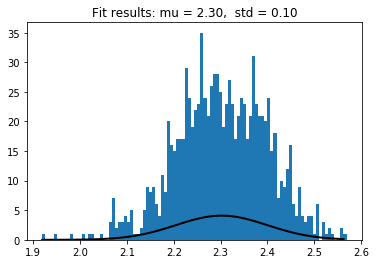

In [263]:
p = norm.pdf(edges[:-1], mu, sigma)
plt.plot(edges[:-1], p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, sigma)
plt.hist(s, bins=100)
plt.title(title)
